In [37]:
import pandas as pd
data_articles = pd.read_csv('Data/scraped_articles.csv')

In [54]:
filtered_data = data_articles[data_articles['content'].str.contains('pijar psikologi', case=False, na=False)]
data_articles = data_articles.drop(filtered_data.index)
data_articles

,title,content
0,Resensi : How to Respect Myself,Judul Buku : How to Respect Myself\nPengarang ...
1,Merasa Bahagia dengan Decluttering Barang,"Saat ini, membeli barang secara on..."
2,Pekerja Media Kreatif Juga Harus Sehat Mental,“Bagaimana cara mengatasi stres pada pekerja s...
3,Being Here and Now : Sebuah Ikhtiar Diri di Te...,Mental illness atau yang biasa dikenal dengan ...
4,Pahit dan Sakit Sebuah Kegagalan,Kegagalan adalah proses manusiawi. Proses ters...
...,...,...
682,Autisme: Malaikat Juga Tahu – Ketulusan Cinta ...,Malaikat Juga Tahu adalah salah satu dari lima...
683,Kemampuan Luar Biasa di Balik Autisme,National Autism Association melakukan riset pa...
684,Anak-anak dengan Autisme pun bisa mandiri!,“Biarkan mereka mewarnai dunia mereka dengan w...
685,Menghadapi Anak dengan Retardasi Mental,Anak dengan retardasi mental seringkali diangg...


In [55]:
# Specify the column to save
column_name = 'content'  # Replace with the actual column name

# Save the column content to a text file
data_articles[column_name].to_csv("dokumen3.txt", index=False, header=False, encoding='utf-8')


In [2]:
file_paths = {
    'dokumen1': 'Data/dokumen1_almost_clean.txt',
    'dokumen2': 'Data/dokumen2_almost_clean.txt',
    'dokumen3': 'Data/dokumen3.txt',
    'dokumen4': 'Data/dokumen4.txt'
}

docs = {}
for doc_name, path in file_paths.items():
    with open(path, 'r', encoding='utf-8') as file:
        docs[doc_name] = file.read()


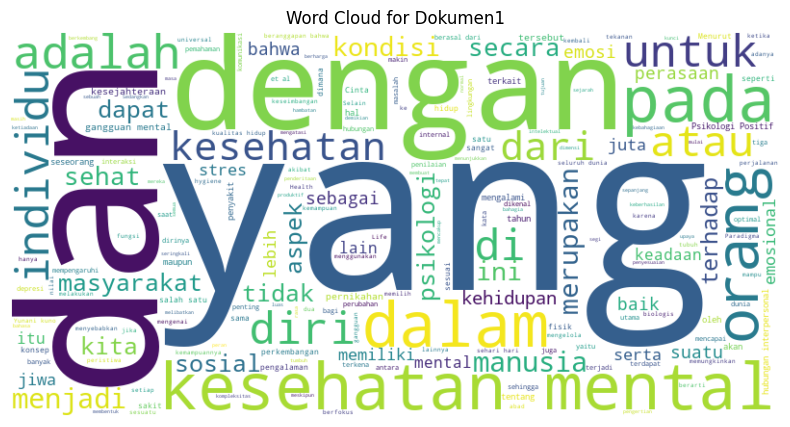

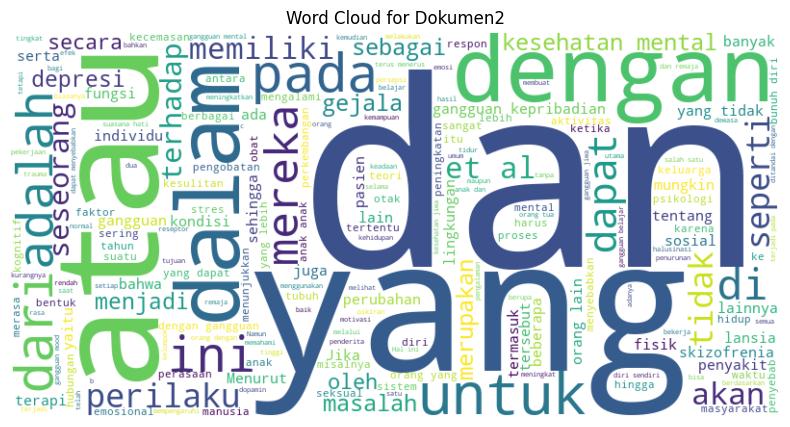

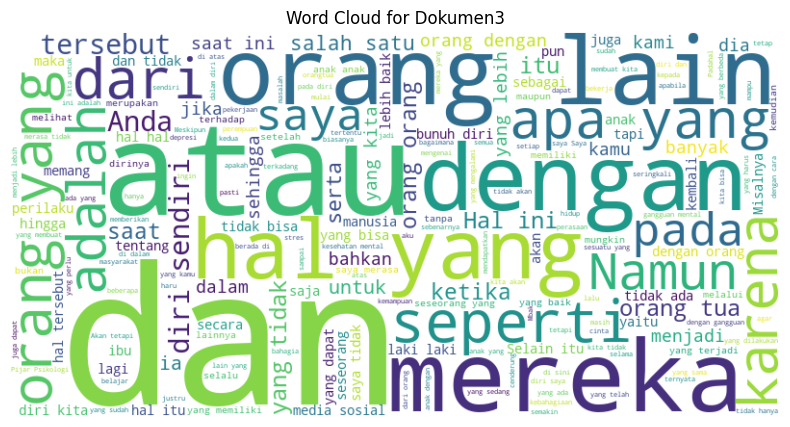

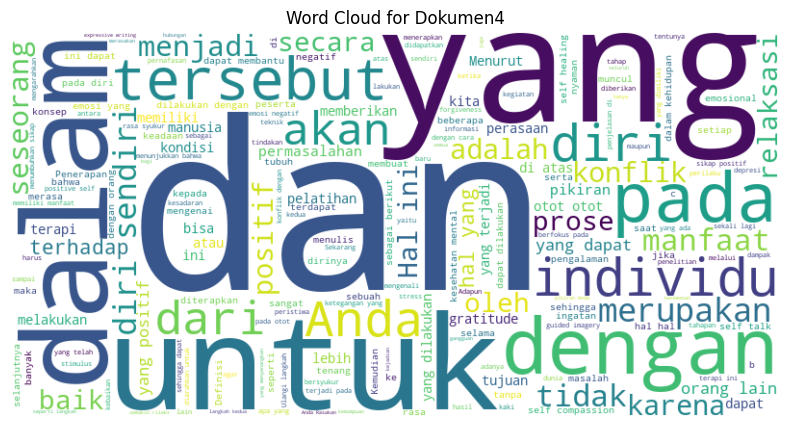

In [4]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Generate word clouds for all documents in the docs dictionary
for doc_name, doc_content in docs.items():
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(doc_content)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Word Cloud for {doc_name.capitalize()}')
    plt.show()


# Preprocessing

In [5]:
import re

def preprocess_text(text: str) -> str:
    # 1. Ganti dua atau lebih newline dengan token sementara agar tidak terganti
    text = re.sub(r'\n{2,}', '[PARA_BREAK]', text)

    # 2. Ganti newline tunggal dengan spasi
    text = text.replace('\n', ' ')

    # 3. Kembalikan token [PARA_BREAK] ke dua newline
    text = text.replace('[PARA_BREAK]', '\n\n')

    # 4. Hapus spasi ganda
    text = re.sub(r' +', ' ', text)

    text = re.sub(r'\bFF\b', '', text)

    # 5. Hapus spasi di awal/akhir teks
    text = text.strip()

    return text


In [6]:
for _,doc in docs.items():
    cleaned_doc = preprocess_text(doc)
    with open(f'Data/cleaned_{_}.txt', 'w', encoding='utf-8') as file:
        file.write(cleaned_doc)
    

In [19]:
file_path1 = 'Data/cleaned_dokumen1.txt'
file_path2 = 'Data/cleaned_dokumen1.txt'

with open(file_path1, 'r', encoding='utf-8') as file:
    dokumen1 = file.read()

with open(file_path2, 'r', encoding='utf-8') as file:
    dokumen2 = file.read()

docs_clean = {
    'dokumen1': dokumen1,
    'dokumen2': dokumen2
}

In [16]:
docs['dokumen1']

'Kesehatan mental memiliki pengertian keadaan dimana\nperkembangan fisik, intelektual dan emosional pada diri\nseseorang tumbuh, berkembang dan matang pada\nkehidupannya, menerima tanggung jawab, menemukan\npenyesuaian, memelihara aturan sosial dan tindakan dalam\nbudayanya. Kesehatan mental berasal dari bahasa Inggris, yaitu\nmental hygiene. Mental berasal dari kata latin mens, mentis yang\nberarti jiwa, nyawa, sukma, roh, dan semangat. Sedangkan\nhygiene berasal dari kata yunani hygiene yang berarti ilmu\ntentang Kesehatan (Ardiansyah et al., 2023).\nMenurut Federasi Kesehatan Mental Dunia (World\nFederation for Mental Health), kesehatan mental adalah (1)\nkondisi yang memungkinkan adanya perkembangan yang\noptimal baik secara fisik, intelektual dan emosional, sepanjang\nhal itu sesuai dengan keadaan orang lain, dan (2) sebuah\nmasyarakat yang baik adalah masyarakat yang membolehkan\nperkembangan ini pada anggota masyarakatnya selain pada saat\nyang sama menjamin dirinya berkembang d